In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.var_model import VARProcess
import statsmodels.api as sm
import numpy as np
from preproccessing import loadStooqData, loadYahooData
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# long rate, short rate, cpi m
tickers = ['IRLTLT01USM156N','IR3TIB01USM156N','CPALTT01USM657N','IRLTLT01PLM156N','IR3TIB01PLM156N','CPALTT01PLM657N','CCUSMA02PLM618N']

start = datetime.datetime(2003, 1, 1)

end = datetime.datetime(2023, 12, 31)

df = web.DataReader(tickers, 'fred', start,end)

In [40]:
df["plnsrp"] = df["IR3TIB01PLM156N"] - df["IR3TIB01USM156N"]
df["cpidiff"] = df["CPALTT01PLM657N"] - df["CPALTT01USM657N"]

In [41]:
df.describe()

,IRLTLT01USM156N,IR3TIB01USM156N,CPALTT01USM657N,IRLTLT01PLM156N,IR3TIB01PLM156N,CPALTT01PLM657N,CCUSMA02PLM618N,plnsrp,cpidiff
count,252.000000,251.000000,252.000000,252.000000,252.000000,252.000000,252.000000,251.000000,252.000000
mean,2.963095,1.710797,0.210571,4.528161,3.721110,0.269444,3.479933,2.022429,0.058873
std,1.123728,1.782531,0.400369,1.642377,2.002508,0.493523,0.529559,1.960240,0.487253
min,0.620000,0.090000,-1.915290,1.190000,0.210000,-0.500000,2.066913,-1.280000,-1.213398
25%,2.057500,0.240000,-0.038477,3.167500,1.720000,0.000000,3.090107,0.120000,-0.265550
50%,2.860000,1.050000,0.208393,5.030000,4.155000,0.200000,3.545319,1.930000,0.003706
75%,3.915000,2.635000,0.474661,5.840000,5.217500,0.500000,3.867890,3.905000,0.338739
max,5.110000,5.490000,1.373608,7.820000,7.510000,3.300000,4.889443,5.320000,2.115290


<AxesSubplot:xlabel='DATE'>

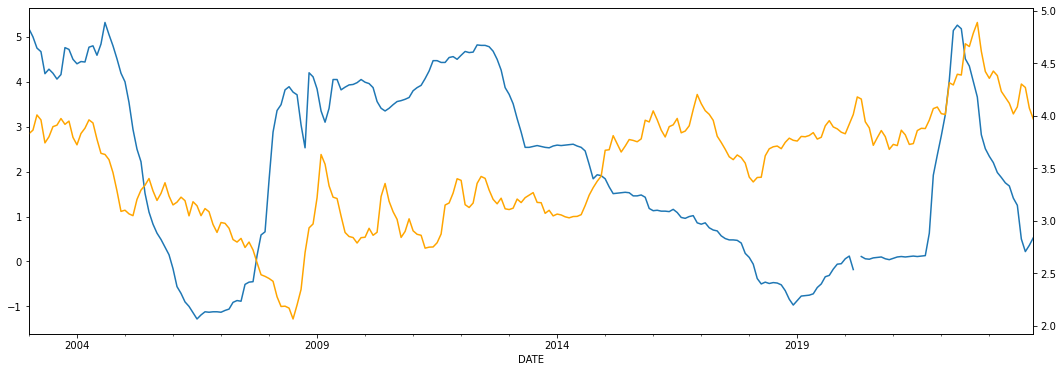

In [37]:
ax1 = df["plnsrp"].plot(figsize=(18,6))
ax2 = ax1.twinx()
df["CCUSMA02PLM618N"].plot(ax=ax2, color='orange')

<AxesSubplot:xlabel='DATE'>

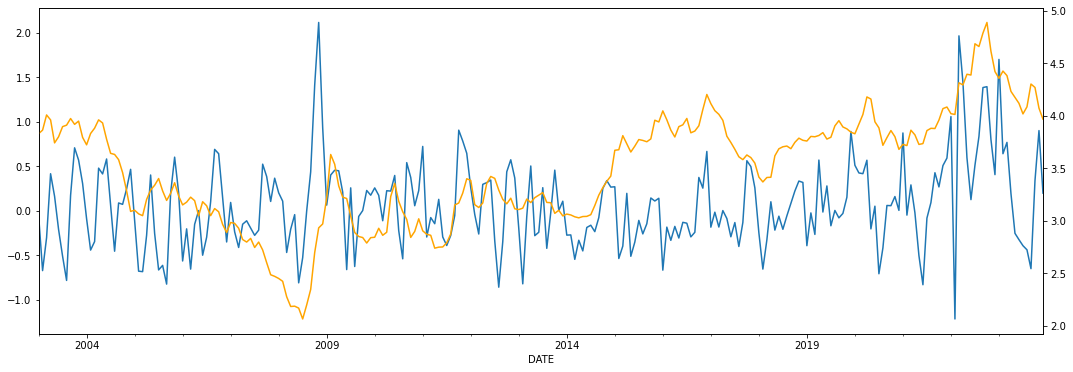

In [42]:
ax1 = df["cpidiff"].plot(figsize=(18,6))
ax2 = ax1.twinx()
df["CCUSMA02PLM618N"].plot(ax=ax2, color='orange')

<AxesSubplot:xlabel='DATE'>

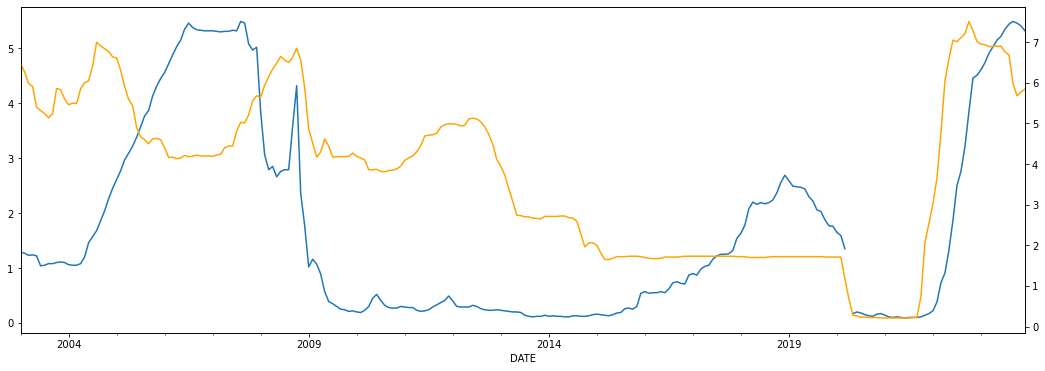

In [38]:
ax1 = df["IR3TIB01USM156N"].plot(figsize=(18,6))
ax2 = ax1.twinx()
df["IR3TIB01PLM156N"].plot(ax=ax2, color='orange')

<AxesSubplot:xlabel='DATE'>

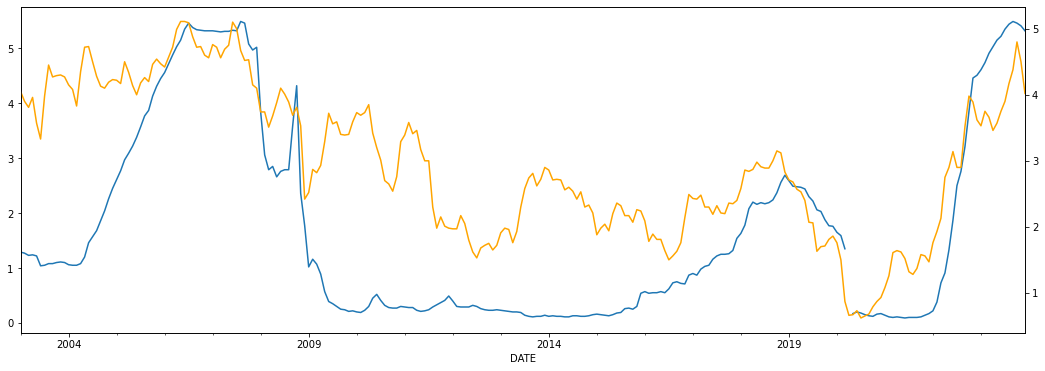

In [39]:
ax1 = df["IR3TIB01USM156N"].plot(figsize=(18,6))
ax2 = ax1.twinx()
df["IRLTLT01USM156N"].plot(ax=ax2, color='orange')